# IMPORTS

In [64]:
import pandas as pd
import numpy as np

import obonet
import networkx as nx

from Bio.SeqIO.FastaIO import SimpleFastaParser

# EXPLORE

### IA (GO, Weight) - Train_Terms (Prot, GO, Subont)

Looking at weights of GO Terms, there are terms with zero weight and do not increase your scoring. Created subsets of go terms, weights, and ontology.

In [ ]:
ia_df = pd.read_csv('DATA/IA.tsv', sep='\t')
train_terms_df = pd.read_csv('DATA/Train/train_terms.tsv', sep='\t')

ia_df = pd.merge(ia_df, train_terms_df[['term', 'aspect']].drop_duplicates(), on='term', how='left')

ia_df[ia_df['term'] == 'GO:0000785']

,term,ia_weight,aspect
26038,GO:0000785,0.824048,C


In [13]:
ia_df.describe()

,ia_weight
count,40122.000000
mean,1.716517
std,2.637009
min,0.000000
25%,0.000000
50%,0.150287
75%,2.705504
max,14.861014


array([[<Axes: title={'center': 'ia_weight'}>]], dtype=object)

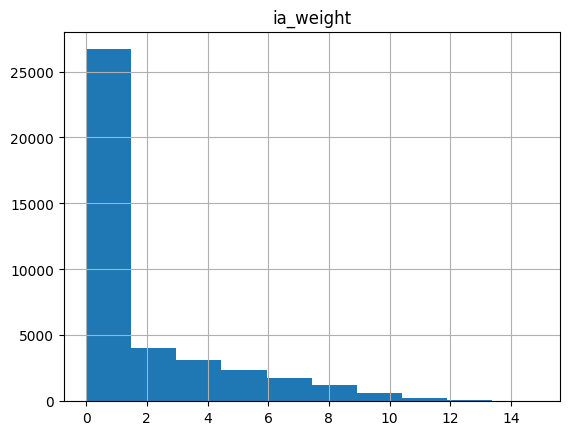

In [12]:
ia_df.hist(bins=10)

array([[<Axes: title={'center': 'ia_weight'}>]], dtype=object)

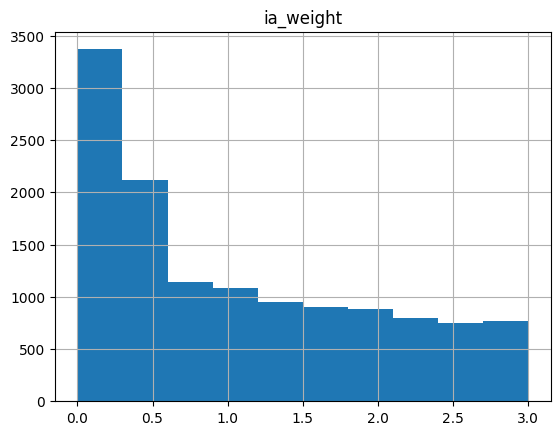

In [30]:
ia_df[(ia_df['ia_weight'] > 0) & (ia_df['ia_weight'] <= 3)].hist()

array([[<Axes: title={'center': 'ia_weight'}>]], dtype=object)

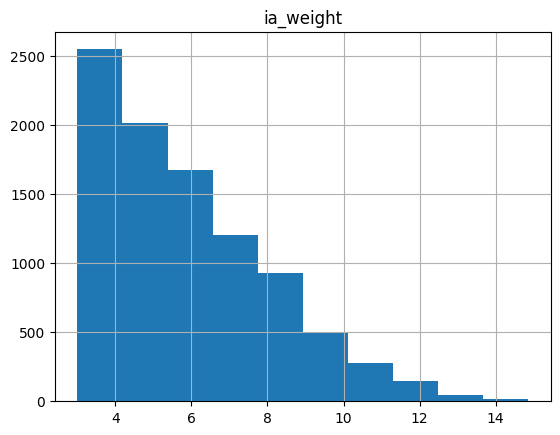

In [31]:
ia_df[(ia_df['ia_weight'] >= 3)].hist()

In [57]:
zero_ia_df = ia_df[ia_df['ia_weight'] == 0]
zero_ia_df.describe()

,ia_weight
count,18044.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [58]:
weighted_ia_df = ia_df[ia_df['ia_weight'] > 0]
weighted_ia_df.describe()

,ia_weight
count,22078.000000
mean,3.119399
std,2.874190
min,0.000297
25%,0.612541
50%,2.321928
75%,4.938599
max,14.861014


array([[<Axes: title={'center': 'ia_weight'}>]], dtype=object)

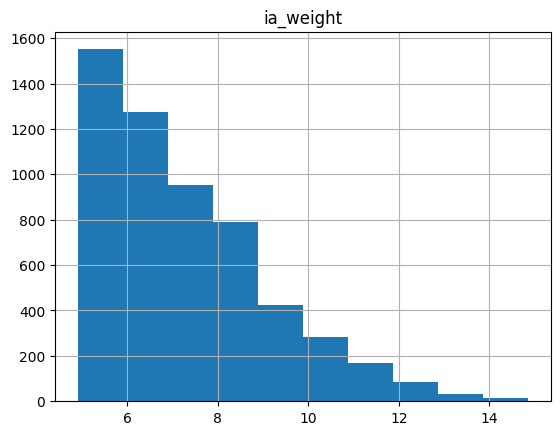

In [59]:
heavy_ia_df = weighted_ia_df[weighted_ia_df['ia_weight'] >= 4.9]
heavy_ia_df.hist(bins=10)

In [ ]:
heavy_ia_df.describe()

,ia_weight
count,5580.000000
mean,7.272618
std,1.862623
min,4.901537
25%,5.772590
50%,6.864186
75%,8.348256
max,14.861014


array([[<Axes: title={'center': 'ia_weight'}>]], dtype=object)

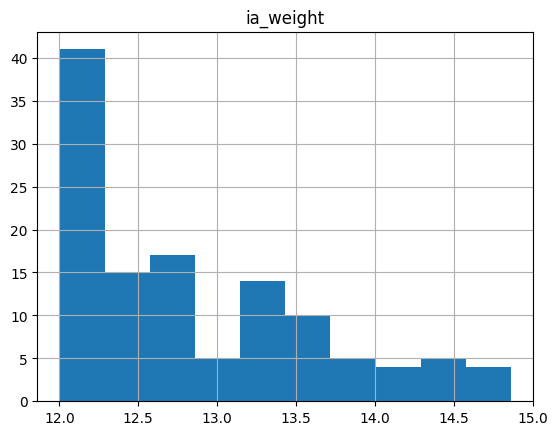

In [61]:
important_ia_df = weighted_ia_df[weighted_ia_df['ia_weight'] >= 12]
important_ia_df.hist(bins=10)

In [62]:
important_ia_df.describe()

,ia_weight
count,120.000000
mean,12.874120
std,0.774886
min,12.003284
25%,12.212838
50%,12.681732
75%,13.310537
max,14.861014


### PARSE PROTIENS

Parse sequences from train_sequences to get aa chains, trains_terms hold accession/protien codes and GO Terms

Need figure out how to predict GO terms based on provided train terms

In [69]:
target_protiens = train_terms_df['EntryID'].head(10).unique().tolist()
target_protiens

['Q5W0B1', 'Q3EC77', 'Q8IZR5']

In [ ]:
target_protiens = train_terms_df['EntryID'].head(10).unique()
sequences = []

with open('DATA/Train/train_sequences.fasta', 'r') as handle:
    for title, sequence in SimpleFastaParser(handle):
        header = title.split()[0]
        accession = header.split('|')[1]
        
        if accession in target_protiens:
            sequences.append(
                {
                    'title': title,
                    'accession': accession,
                    'sequence': sequence
                }
            )

sequences


[{'title': 'sp|Q8IZR5|CKLF4_HUMAN CKLF-like MARVEL transmembrane domain-containing protein 4 OS=Homo sapiens OX=9606 GN=CMTM4 PE=1 SV=1',
  'accession': 'Q8IZR5',
  'sequence': 'MRSGEELDGFEGEASSTSMISGASSPYQPTTEPVSQRRGLAGLRCDPDYLRGALGRLKVAQVILALIAFICIETIMACSPCEGLYFFEFVSCSAFVVTGVLLIMFSLNLHMRIPQINWNLTDLVNTGLSAFLFFIASIVLAALNHRAGAEIAAVIFGFLATAAYAVNTFLAVQKWRVSVRQQSTNDYIRARTESRDVDSRPEIQRLDTFSYSTNVTVRKKSPTNLLSLNHWQLA'},
 {'title': 'sp|Q5W0B1|OBI1_HUMAN ORC ubiquitin ligase 1 OS=Homo sapiens OX=9606 GN=OBI1 PE=1 SV=1',
  'accession': 'Q5W0B1',
  'sequence': 'MAQTVQNVTLSLTLPITCHICLGKVRQPVICINNHVFCSICIDLWLKNNSQCPACRVPITPENPCKEIIGGTSESEPMLSHTVRKHLRKTRLELLHKEYEDEIDCLQKEVEELKSKNLSLESQIKTILDPLTLVQGNQNEDKHLVTDNPSKINPETVAEWKKKLRTANEIYEKVKDDVDKLKEANKKLKLENGGLVRENLRLKAEVDNRSPQKFGRFAVAALQSKVEQYERETNRLKKALERSDKYIEELESQVAQLKNSSEEKEAMNSICQTALSADGKGSKGSEEDVVSKNQGDSARKQPGSSTSSSSHLAKPSSSRLCDTSSARQESTSKADLNCSKNKDLYQEQVEVMLDVTDTSMDTYLEREWGNKPSDCVPYKDEELYDLPAPCTPLSLSCLQLSTPENRESSVVQAGGSKKHSNHLRKLVFDDFCDSSNVSNKDSSE

# DATA PREP

In [ ]:
# zero_ia_df
# weighted_ia_df
# heavy_ia_df
# important_ia_df

In [ ]:
important_ia_df.head()

,term,ia_weight,aspect
3128,GO:0008218,12.177856,P
4209,GO:0010583,12.276561,P
4815,GO:0015728,12.059682,P
7111,GO:0031413,13.803728,P
7818,GO:0032898,12.292226,NaN
